In [17]:
import pandas as pd
import json
import os

In [11]:
data01 = json.loads(open("./dump-fase2/Cliente 0 ao 100/financings/01-financings-contracts.json").read())

In [12]:
data01[0]

{'contractId': 'c194d903-fca1-497f-b5f3-0204e426e798',
 'customerId': '595.080.896-84',
 'organizationId': '69665991-da55-4aac-a1f2-32d23daba8fe',
 'organizationName': 'Instituição Financeira 03',
 'brandName': 'Instituição Financeira 03',
 'companyCnpj': '00.047.912/7906-49',
 'productType': 'FINANCIAMENTOS_IMOBILIARIOS',
 'ipocCode': 'NA'}

In [36]:
folder_root = "./dump-fase2"
gdata = {}
for folder in os.listdir(folder_root):
    #ldata = json.loads(open(f"./dump-fase2/{folder}/financings/02-financings-details.json").read())
    for folder2 in os.listdir(f"./dump-fase2/{folder}"):
        for filejson in os.listdir(f"./dump-fase2/{folder}/{folder2}"):
            filepath = f"./dump-fase2/{folder}/{folder2}/{filejson}"
            filejsonkey = filejson.replace(".json", "")
            filejsonkey = "-".join(filejsonkey.split("-")[1:])
            if not filejsonkey in gdata:
                gdata[filejsonkey] = []
            ldata = json.loads(open(f"./dump-fase2/{folder}/{folder2}/{filejson}").read())
            gdata[filejsonkey].extend(ldata)

In [37]:
for k in gdata:
    with open(f"{k}.json", "w") as f:
        f.write(json.dumps(gdata[k]))

In [34]:
gdata.keys()

dict_keys(['accounts-accounts', 'accounts-details', 'accounts-balances', 'accounts-transactions', 'accounts-overdraft-limits', 'credit-cards', 'credit-cards-details', 'credit-cards-limits', 'credit-cards-transactions', 'credit-cards-bills', 'credit-cards-bills-transactions', 'financial-relation', 'personal-identification', 'personal-qualification', 'financings-contracts', 'financings-details', 'financings-warranties', 'financings-payments', 'financings-scheduled-instalments', 'loans-contracts', 'loans-details', 'loans-warranties', 'loans-payments', 'loans-scheduled-instalments'])

In [35]:
len(gdata['financings-contracts'])

100

In [21]:
len(gdata)

500

In [22]:
df = pd.DataFrame(gdata)

In [26]:
set(df['productType'].values)

{'FINANCIAMENTOS', 'FINANCIAMENTOS_IMOBILIARIOS', 'FINANCIAMENTOS_RURAIS'}

In [23]:
df

,contractId,contractNumber,customerId,organizationId,organizationName,ipocCode,productName,productType,contractDate,settlementDate,...,dueDate,instalmentPeriodicity,instalmentPeriodicityAdditionalInfo,firstInstalmentDueDate,CET,amortizationScheduled,amortizationScheduledAdditionalInfo,interestRates,contractedFees,contractedFinanceCharges
0,c194d903-fca1-497f-b5f3-0204e426e798,c194d903-fca1-497f-b5f3-0204e426e798,595.080.896-84,69665991-da55-4aac-a1f2-32d23daba8fe,Instituição Financeira 03,NA,Crédito Pessoal Consignado,FINANCIAMENTOS_IMOBILIARIOS,2021-07-01,NA,...,2051-07-29,MENSAL,Periodicidade Mensal,2021-07-30,0.582847,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA...
1,3528e870-9a85-4160-a81f-0aa20359f3c7,3528e870-9a85-4160-a81f-0aa20359f3c7,412.289.303-97,69665991-da55-4aac-a1f2-32d23daba8fe,Instituição Financeira 03,NA,Crédito Pessoal Consignado,FINANCIAMENTOS,2021-04-02,NA,...,2024-04-30,MENSAL,Periodicidade Mensal,2021-05-01,0.429770,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA...
2,e0432420-a9c9-450b-85ed-2753fbdfa4b0,e0432420-a9c9-450b-85ed-2753fbdfa4b0,785.797.738-73,d3d2b0d5-903a-4f9f-b793-c139490d5ca7,Instituição Financeira 09,NA,Crédito Pessoal Consignado,FINANCIAMENTOS_IMOBILIARIOS,2021-11-04,NA,...,2041-12-02,MENSAL,Periodicidade Mensal,2021-12-03,0.643787,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA...
3,872c89e5-4234-4b0b-a0ae-30cd0f3e3e66,872c89e5-4234-4b0b-a0ae-30cd0f3e3e66,331.154.515-63,3fda1ef5-4b72-4557-bcbf-296780ba2c1f,Instituição Financeira 01,NA,Crédito Pessoal Consignado,FINANCIAMENTOS_RURAIS,2021-01-02,NA,...,2031-01-31,MENSAL,Periodicidade Mensal,2021-02-01,0.527927,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA...
4,ca78548d-b209-4134-9dd9-fa8eee2e5efd,ca78548d-b209-4134-9dd9-fa8eee2e5efd,114.795.138-29,e7fc1280-4dd3-4977-bc24-c08ffea8baf5,Instituição Financeira 06,NA,Crédito Pessoal Consignado,FINANCIAMENTOS_IMOBILIARIOS,2021-04-18,NA,...,2051-05-16,MENSAL,Periodicidade Mensal,2021-05-17,0.709223,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,a753bfd9-1a38-4649-b6b6-e262128063c1,a753bfd9-1a38-4649-b6b6-e262128063c1,504.337.567-56,ac2ab4c1-dc48-4958-b964-e46938817aaa,Instituição Financeira 10,NA,Crédito Pessoal Consignado,FINANCIAMENTOS,2021-11-04,NA,...,2024-12-02,MENSAL,Periodicidade Mensal,2021-12-03,0.684480,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA...
496,e8a300d2-025d-43dc-b0c3-bf137691aba5,e8a300d2-025d-43dc-b0c3-bf137691aba5,797.640.888-18,d3d2b0d5-903a-4f9f-b793-c139490d5ca7,Instituição Financeira 09,NA,Crédito Pessoal Consignado,FINANCIAMENTOS_IMOBILIARIOS,2021-04-09,NA,...,2051-05-07,MENSAL,Periodicidade Mensal,2021-05-08,0.632938,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA...
497,6362005a-ad64-4d57-91b8-97df9664df12,6362005a-ad64-4d57-91b8-97df9664df12,478.472.740-45,f4851ca0-7163-4d71-97a7-df1e999c047f,Instituição Financeira 07,NA,Crédito Pessoal Consignado,FINANCIAMENTOS_IMOBILIARIOS,2021-04-29,NA,...,2051-05-27,MENSAL,Periodicidade Mensal,2021-05-28,0.302932,SAC,NA,"[{'taxType': 'EFETIVA', 'interestRateType': 'S...","[{'feeName': 'Excesso em Conta', 'feeCode': 'E...",[{'chargeType': 'JUROS_REMUNERATORIOS_POR_ATRA..

array([[<AxesSubplot:title={'center':'contractAmount'}>]], dtype=object)

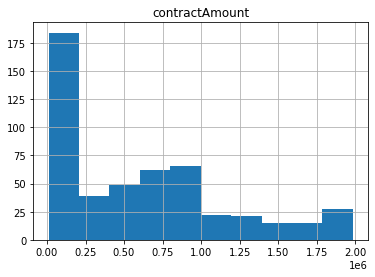

In [28]:
df[['contractNumber', 'contractAmount']].hist()

In [13]:
data02 = json.loads(open("./dump-fase2/Cliente 0 ao 100/financings/02-financings-details.json").read())

In [16]:
print(json.dumps(data02[0], indent=4))

{
    "contractId": "c194d903-fca1-497f-b5f3-0204e426e798",
    "contractNumber": "c194d903-fca1-497f-b5f3-0204e426e798",
    "customerId": "595.080.896-84",
    "organizationId": "69665991-da55-4aac-a1f2-32d23daba8fe",
    "organizationName": "Institui\u00e7\u00e3o Financeira 03",
    "ipocCode": "NA",
    "productName": "Cr\u00e9dito Pessoal Consignado",
    "productType": "FINANCIAMENTOS_IMOBILIARIOS",
    "contractDate": "2021-07-01",
    "settlementDate": "NA",
    "contractAmount": 736010.23,
    "currency": "BRL",
    "dueDate": "2051-07-29",
    "instalmentPeriodicity": "MENSAL",
    "instalmentPeriodicityAdditionalInfo": "Periodicidade Mensal",
    "firstInstalmentDueDate": "2021-07-30",
    "CET": 0.582846645499044,
    "amortizationScheduled": "SAC",
    "amortizationScheduledAdditionalInfo": "NA",
    "interestRates": [
        {
            "taxType": "EFETIVA",
            "interestRateType": "SIMPLES",
            "taxPeriodicity": "AA",
            "calculation": "21/25

In [3]:
df = pd.read_json("./dump-fase4/Insurance/02-homes.json")

In [5]:
df

,participant,society,name,code,coverages,propertyCharacteristics,propertyPostalCode,protective,additionals,additionalInfo,assistanceServices,termsAndConditions,terms,termsAdditionalInfo,customerService,premiumPayment,minimumRequirement,targetAudience
0,"{'brand': 'Instituição Financeira 03', 'name':...","{'name': 'Instituição Financeira 03', 'cnpjNum...",Produto A,3,"[{'type': 'IMOVEL_BASICA', 'detail': 'string',...","[{'type': 'CASA', 'buildTypes': ['ALVENARIA'],...",13110000,False,[SORTEIO_GRATUITO],"Detalhar os serviços, benefícios e outros","[{'package': 'ATE_10_SERVICOS', 'detail': 'Pla...",[{'susepProcessNumber': '15414.622222/2222-22'...,[ANUAL],string,REDE_REFERENCIADA,"{'paymentMethods': ['CARTAO_CREDITO'], 'paymen...","{'contractType': 'COLETIVO', 'contractingMinRe...",PESSOA_NATURAL_JURIDICA
1,"{'brand': 'Instituição Financeira 02', 'name':...","{'name': 'Instituição Financeira 02', 'cnpjNum...",Produto A,2,"[{'type': 'IMOVEL_BASICA', 'detail': 'string',...","[{'type': 'CASA', 'buildTypes': ['ALVENARIA'],...",13110000,False,[SORTEIO_GRATUITO],"Detalhar os serviços, benefícios e outros","[{'package': 'ATE_10_SERVICOS', 'detail': 'Pla...",[{'susepProcessNumber': '15414.622222/2222-22'...,[ANUAL],string,REDE_REFERENCIADA,"{'paymentMethods': ['CARTAO_CREDITO'], 'paymen...","{'contractType': 'COLETIVO', 'contractingMinRe...",PESSOA_NATURAL_JURIDICA
2,"{'brand': 'Instituição Financeira 01', 'name':...","{'name': 'Instituição Financeira 01', 'cnpjNum...",Produto A,1,"[{'type': 'IMOVEL_BASICA', 'detail': 'string',...","[{'type': 'CASA', 'buildTypes': ['ALVENARIA'],...",13110000,False,[SORTEIO_GRATUITO],"Detalhar os serviços, benefícios e outros","[{'package': 'ATE_10_SERVICOS', 'detail': 'Pla...",[{'susepProcessNumber': '15414.622222/2222-22'...,[ANUAL],string,REDE_REFERENCIADA,"{'paymentMethods': ['CARTAO_CREDITO'], 'paymen...","{'contractType': 'COLETIVO', 'contractingMinRe...",PESSOA_NATURAL_JURIDICA
3,"{'brand': 'Instituição Financeira 04', 'name':...","{'name': 'Instituição Financeira 04', 'cnpjNum...",Produto A,4,"[{'type': 'IMOVEL_BASICA', 'detail': 'string',...","[{'type': 'CASA', 'buildTypes': ['ALVENARIA'],...",13110000,False,[SORTEIO_GRATUITO],"Detalhar os serviços, benefícios e outros","[{'package': 'ATE_10_SERVICOS', 'detail': 'Pla...",[{'susepProcessNumber': '15414.622222/2222-22'...,[ANUAL],string,REDE_REFERENCIADA,"{'paymentMethods': ['CARTAO_CREDITO'], 'paymen...","{'contractType': 'COLETIVO', 'contractingMinRe...",PESSOA_NATURAL_JURIDICA
4,"{'brand': 'Instituição Financeira 05', 'name':...","{'name': 'Instituição Financeira 05', 'cnpjNum...",Produto A,5,"[{'type': 'IMOVEL_BASICA', 'detail': 'string',...","[{'type': 'CASA', 'buildTypes': ['ALVENARIA'],...",13110000,False,[SORTEIO_GRATUITO],"Detalhar os serviços, benefícios e outros","[{'package': 'ATE_10_SERVICOS', 'detail': 'Pla...",[{'susepProcessNumber': '15414.622222/2222-22'...,[ANUAL],string,REDE_REFERENCIADA,"{'paymentMethods': ['CARTAO_CREDITO'], 'paymen...","{'contractType': 'COLETIVO', 'contractingMinRe...",PESSOA_NATURAL_JURIDICA
